In [7]:
!pip install seaborn

You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Install graphviz first

### Mac OSX
```
brew install graphviz
```

###  Ubuntu
```
sudo apt-get install graphviz libgraphviz-dev pkg-config
```

In [8]:
!pip install pygraphviz

  Using cached https://files.pythonhosted.org/packages/7e/b1/d6d849ddaf6f11036f9980d433f383d4c13d1ebcfc3cd09bc845bda7e433/pygraphviz-1.5.zip
  Complete output from command /Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -u -c "import setuptools, tokenize;__file__='/private/var/folders/dp/hyv8sj3j7zd_klv2gl5mkh540000gn/T/pip-install-0bon4cla/pygraphviz/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /private/var/folders/dp/hyv8sj3j7zd_klv2gl5mkh540000gn/T/pip-wheel-5yxgul6w --python-tag cp37:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.9-x86_64-3.7
  creating build/lib.macosx-10.9-x86_64-3.7/pygraphviz
  copying pygraphviz/release.py -> build/lib.macosx-10.9-x86_64-3.7/pygraphviz
  copying pygraphviz/version.py -> build/lib.macosx-10.9-x86_64-3.7/pygraphviz
  copying pygraphviz/graphviz.py -> build/lib.macosx

In [9]:
import math
import numpy as np
import networkx as nx
import pandas as pd
from collections import Counter
import operator

# Plotting
import matplotlib
# # matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Networkx
from networkx.drawing.nx_agraph import graphviz_layout
from viz import dzcnapy_plotlib as dzcnapy
from util.paths import get_output_file_path
from util.pickles import load_pickle_file

ModuleNotFoundError: No module named 'viz'

In [10]:
def get_colors(depth):
    return sns.cubehelix_palette(depth, start=3, rot=100, reverse=True)
    #return sns.hls_palette(10)
    sns.palplot(colors)
    
def plot_network(graph, title):
    plt.axis('off')
    pos = graphviz_layout(graph)
    depth = max(nx.get_node_attributes(graph,'generation').values()) + 1
    colors = get_colors(depth)
    color = [colors[graph.node[n].get("generation", 0)] for n in graph]
    dzcnapy.small_attrs["node_color"] = color
    nx.draw_networkx(graph, pos=pos, with_labels=False, **dzcnapy.small_attrs)
    patchList = []
    for index in range(depth):
        data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
        patchList.append(data_key)
    plt.legend(handles=patchList)
    dzcnapy.set_extent(pos, plt)
    dzcnapy.plot(title, [12, 8], save=True)

In [11]:

from util.paths import get_output_file_path
from util.pickles import load_pickle_file

ModuleNotFoundError: No module named 'util'

In [12]:
import networkx as nx
from tqdm import tqdm

def build_networkx_graph(unique_users):
    network_graph = nx.DiGraph()
    for i in tqdm(range(len(unique_users))):
        index = unique_users.index[i]
        network_graph.add_node(index,
                             user_id = unique_users.loc[index, 'id'],
                             time_lapsed = unique_users.loc[index, 'time_lapsed'],
                             followers_count = unique_users.loc[index, 'followers_count'],
                             friends_count = unique_users.loc[index, 'friends_count'],
                             generation = int(unique_users.loc[index, 'generation']),
                             time_since_seed = unique_users.loc[index, 'time_since_seed'],
                            )
        source_index = unique_users.loc[index, 'source_index']
        if np.isnan(source_index) == False:
            network_graph.add_edge(source_index, index)
    return network_graph

In [256]:
givenchy_users=load_pickle_file(get_output_file_path("givenchy_users.dat"))

Loading data file from /Users/syamantak/JayateeB/dissertation/output/givenchy_users.dat
Loaded 5973 entries


In [257]:
givenchy_users = givenchy_users[givenchy_users['time_lapsed'].isnull() == False]

In [261]:
a=[0,1,2,3,4,5,6]
unique_users=givenchy_users[givenchy_users.generation.isin(a)]

In [264]:
gu_generation = unique_users.groupby(["generation"])["id"].count()
gu_generation.name = "actual"

In [265]:
gu_generation

generation
0      99
1     853
2    3198
3     297
4     560
5       4
Name: actual, dtype: int64

In [170]:
network_all = build_networkx_graph(unique_users)

100%|██████████| 5011/5011 [00:00<00:00, 11263.05it/s]


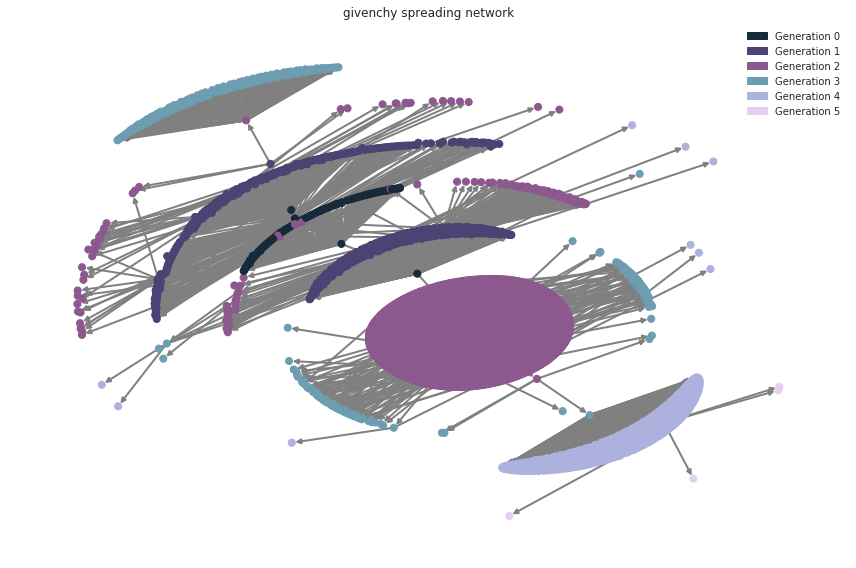

In [171]:
plot_network(network_all, "givenchy spreading network")

In [79]:
def spreading_network(users, title):
    users = users[users['time_lapsed'].isnull() == False]
    a=[0,1,2,3,4,5]
    unique_users=users[users.generation.isin(a)]
    network_all = build_networkx_graph(unique_users)
    plot_network(network_all, title)

100%|██████████| 5011/5011 [00:00<00:00, 13814.26it/s]


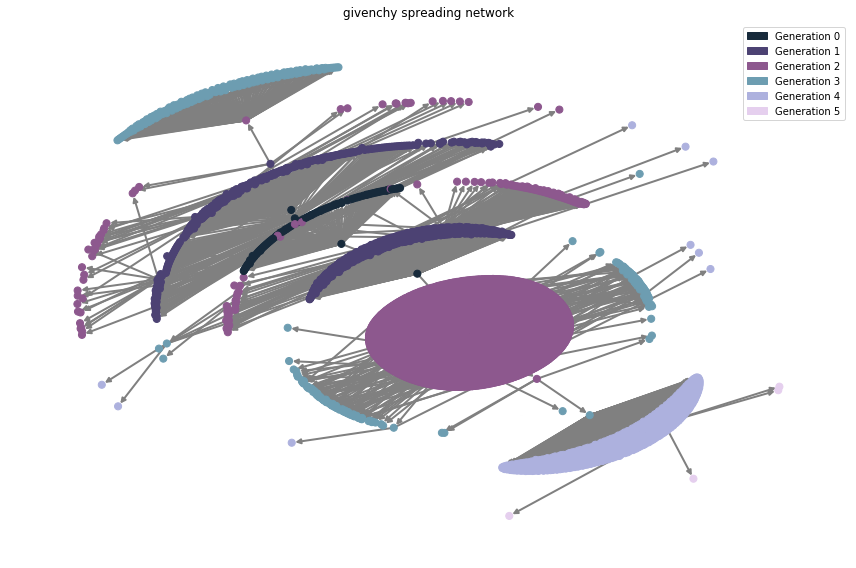

In [38]:
spreading_network(givenchy_users, "givenchy spreading network")

In [122]:
gs_6_hrs_retrained = pd.read_csv(get_output_file_path("givenchy_simulation_result_6hrs_6_hrs_model_retrained.csv"))

In [123]:
gs_6_hrs_retrained = gs_6_hrs_retrained[gs_6_hrs_retrained['time_lapsed'].isnull() == False]

In [268]:
gu_retrained = gs_6_hrs_retrained.groupby(["generation"])["id"].count()

In [269]:
gu_retrained.name= "retrained"

In [270]:
gu_retrained

generation
0.0      88
1.0     875
2.0    2959
3.0     370
4.0     557
5.0      18
6.0       2
Name: retrained, dtype: int64

100%|██████████| 4867/4867 [00:00<00:00, 11929.86it/s]


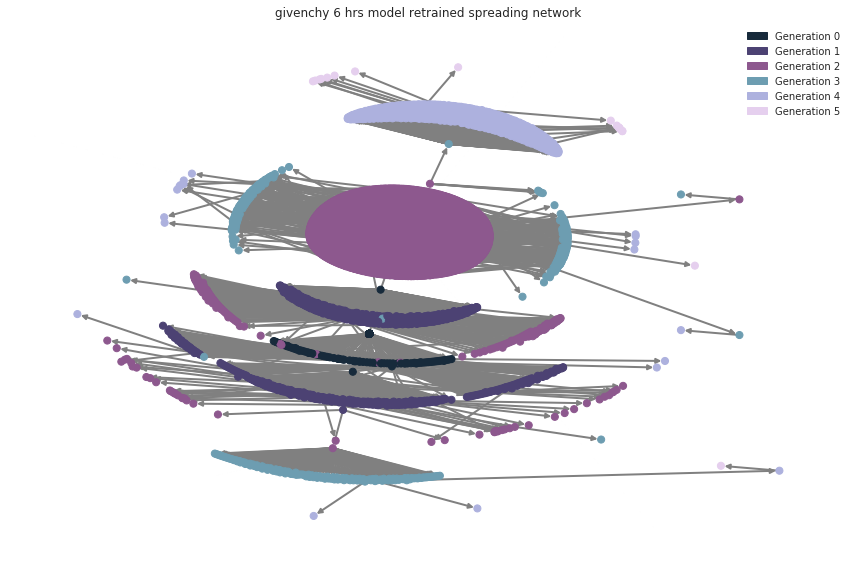

In [124]:
spreading_network(gs_6_hrs_retrained, "givenchy 6 hrs model retrained spreading network")

100%|██████████| 4867/4867 [00:00<00:00, 7653.77it/s]


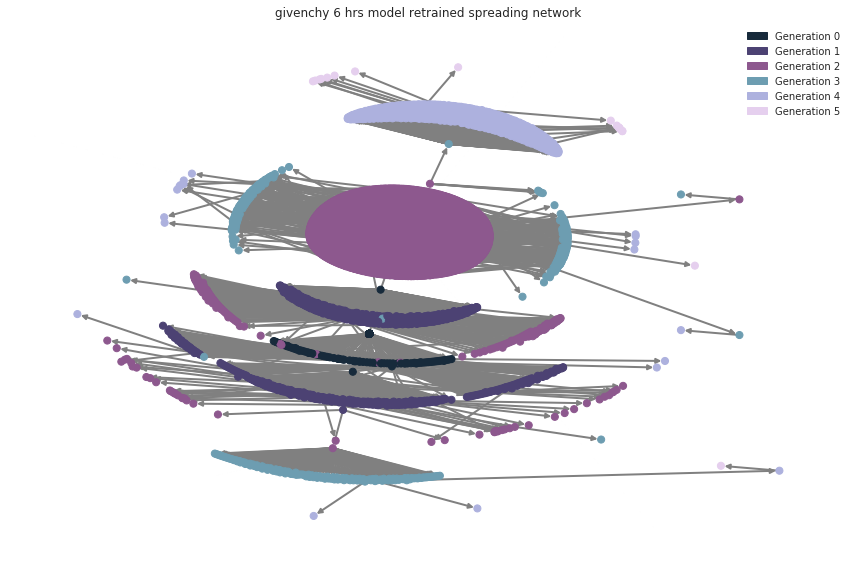

In [142]:
spreading_network(gs_6_hrs_retrained, "givenchy 6 hrs model retrained spreading network")

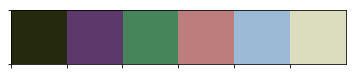

In [39]:
sns.palplot(sns.cubehelix_palette(6, start=3, rot=500, reverse=True))

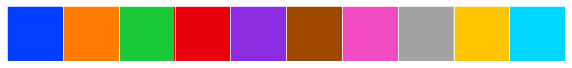

In [101]:
sns.palplot(sns.color_palette("bright"))

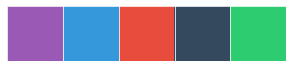

In [115]:
flatui = ["#9b59b6", "#3498db","#e74c3c", "#34495e", "#2ecc71"]
    # create a color palette
sns.palplot(sns.color_palette(flatui).as_hex())


In [103]:
my_cmap

In [143]:
nyc_usrs_file = "/Users/syamantak/JayateeB/new_files/data/nyc/nyc_users.dat"
nyc_users=load_pickle_file(nyc_usrs_file)

Loading data file from /Users/syamantak/JayateeB/new_files/data/nyc/nyc_users.dat
Loaded 135912 entries


In [50]:
nyc_users[['screen_name','followers_count']].sort_values(by = 'followers_count',ascending = False)[0:10]

screen_name  followers_count
12973          nytimes         40466012
92795              CNN         38721228
126465       zaynmalik         27066442
132181         pitbull         26458612
39496         BBCWorld         22038908
115603  HillaryClinton         21715371
4181           FoxNews         17469233
73758       WhiteHouse         16100033
12896              WSJ         15231947
5572    washingtonpost         12292538

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
def plot_grouped_bar(labels, first_series, second_series, first_label, second_label, title, ylabel):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    plt.style.use('seaborn-darkgrid')

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, first_series, width, label=first_label, color='#2169D4')
    rects2 = ax.bar(x + width/2, second_series, width, label=second_label, color='#2BBD0E')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel,fontsize=16)
    ax.set_title(title,fontsize=16)
    ax.set_xticks(x,)
    ax.set_xticklabels(labels)
    ax.legend()
    autolabel(rects1, ax
    autolabel(rects2, ax)

    fig.tight_layout()
    fig.set_size_inches(12, 8, forward=True)

    plt.show()




In [14]:
from matplotlib.colors import ListedColormap

color_pallette = ['blue','green','black']

def plot_grouped_line(df, title, xlabel, ylabel, x_column="x"):
    # style
    plt.style.use('seaborn-darkgrid')
    #flatui = ["#9b59b6", "#3498db","#e74c3c", "#34495e", "#2ecc71"]
    # create a color palette
    #palette = ListedColormap(sns.color_palette(flatui).as_hex())
    #palette = plt.get_cmap('Set1')

    num=0
    columns = []
    for column in df.drop(x_column, axis=1):
        columns.append(column)
    num_data_points = len(df[column])
    for column in columns:
        num+=1
        plt.plot(df[x_column], df[column], marker='', color=color_pallette[num - 1], linewidth=1, alpha=0.9, label=column)
        for i, (x, y) in enumerate(zip(df[x_column], df[column])):
            if i == 0 or i == 1 or i == num_data_points - 1 or i % 3 == 0:
                label = "{:.2f}".format(y)
                pos_from_xy = -10 if num % 2 == 0 else 10
                plt.annotate(label, # this is the text
                             (x,y), # this is the point to label
                             textcoords="offset points", # how to position the text
                             xytext=(0,pos_from_xy), # distance from text to points (x,y)
                             ha='center',
                             color=color_pallette[num - 1]) 

    plt.rcParams['figure.figsize'] = [12, 8]
    plt.legend()
    # Add titles
    plt.title(title, loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel(xlabel)
    plt.xticks(df[x_column], rotation=90)
    plt.ylabel(ylabel)


## Actual vs Retrained by generation

In [271]:
a=[0,1,2,3,4,5]
givenchy_users=load_pickle_file(get_output_file_path("givenchy_users.dat"))
givenchy_users = givenchy_users[givenchy_users['time_lapsed'].isnull() == False]
unique_users=givenchy_users[givenchy_users.generation.isin(a)]
gu_generation = unique_users.groupby(["generation"])["id"].count()
gu_generation.name = "actual"

Loading data file from /Users/syamantak/JayateeB/dissertation/output/givenchy_users.dat
Loaded 5973 entries


In [272]:
gs_6_hrs_retrained = pd.read_csv(get_output_file_path("givenchy_simulation_result_6hrs_6_hrs_model_retrained.csv"))
gs_6_hrs_retrained = gs_6_hrs_retrained[gs_6_hrs_retrained['time_lapsed'].isnull() == False]
retrained_unique_users=gs_6_hrs_retrained[gs_6_hrs_retrained.generation.isin(a)]
gu_retrained = retrained_unique_users.groupby(["generation"])["id"].count()
gu_retrained.name= "retrained"

In [277]:
actual_v_retrained_by_generation = pd.concat([gu_generation, gu_retrained], axis=1)

In [278]:
actual_v_retrained_by_generation

actual  retrained
generation                   
0               99         88
1              853        875
2             3198       2959
3              297        370
4              560        557
5                4         18

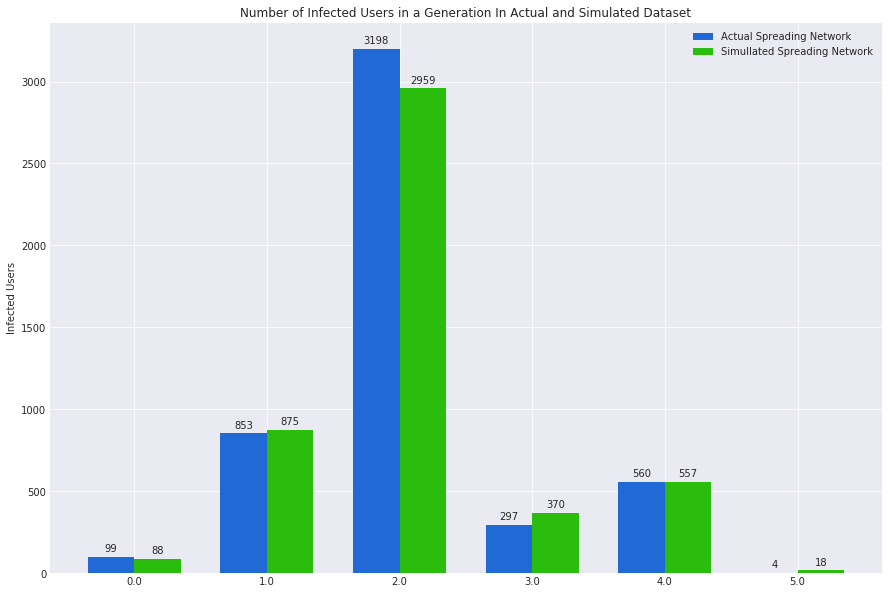

In [294]:
plot_grouped_bar(labels=gu_retrained.index.tolist(),
                 first_series=gu_generation.tolist(), 
                 second_series=gu_retrained.tolist(), 
                 first_label="Actual Spreading Network", 
                 second_label="Simullated Spreading Network", 
                 #title="Number of Infected Users in a Generation In Actual and Simulated Dataset",
                 ylabel="Infected Users")

## Degree

In [296]:
gen_degree=[0,1,2,3,4,5,6,7,8,9,10]

In [297]:
neighbour_degree_sim = pd.read_csv(get_output_file_path("simulation_result_key_node_avg_neighbour_degree_top_10_not_filtered.csv"))

neighbour_degree_sim = neighbour_degree_sim[neighbour_degree_sim.generation.isin(gen_degree)]


In [298]:
node_degree_sim = pd.read_csv(get_output_file_path("simulation_result_key_node_degree_top_10_0point7_start_time_30.csv"))

node_degree_sim = node_degree_sim[node_degree_sim.generation.isin(gen_degree)]


In [299]:
generation_labels = neighbour_degree_sim.groupby(['generation']).count()['id'].index.tolist()
neighbour_degree_generations =  neighbour_degree_sim.groupby(['generation']).count()['id'].tolist()

In [300]:
node_degree_generations = node_degree_sim.groupby(['generation']).count()['id'].tolist()


In [2]:
neighbour_degree_time_lapsed1 = [10,851, 5285, 21445, 16739, 7921, 2989, 888, 382, 237, 126, 52, 18, 1, 1]
node_degree_time_lapsed1 = [10,1434, 7512, 18682, 14798, 7467, 2089, 858, 332, 217, 106, 45, 7, 1]

In [291]:
diff = len(neighbour_degree_generations) - len(node_degree_generations)
for i in range(diff):
    node_degree_generations.append(0)

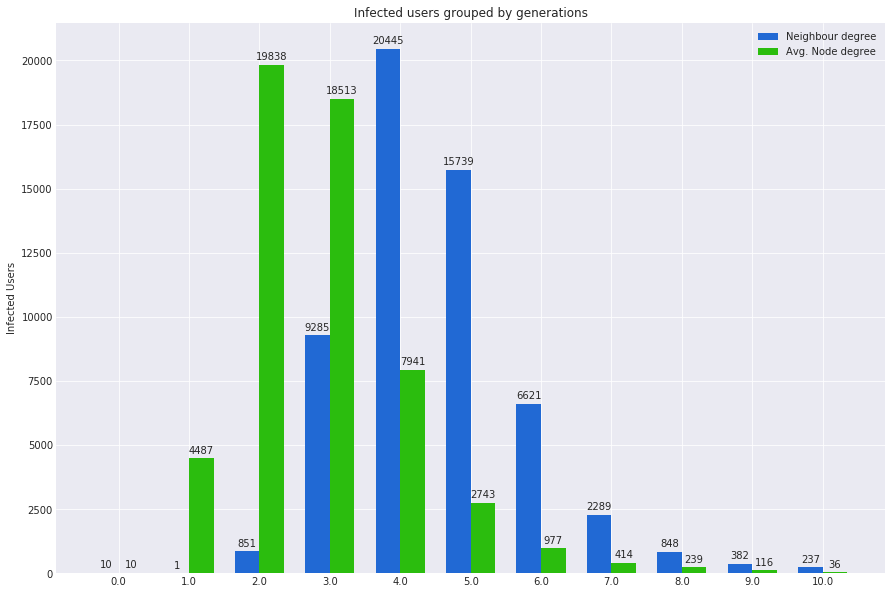

In [301]:
plot_grouped_bar(labels=generation_labels,
                 first_series=neighbour_degree_generations, 
                 second_series=node_degree_generations, 
                 first_label="Neighbour degree", 
                 second_label="Avg. Node degree", 
                 title="Infected users grouped by generations",
                 ylabel="Infected Users")

In [18]:
time_lapsed_labels = neighbour_degree_sim.groupby(['time_lapsed']).count()['id'].index.tolist()
neighbour_degree_time_lapsed =  neighbour_degree_sim.groupby(['time_lapsed']).count()['id'].tolist()

NameError: name 'neighbour_degree_sim' is not defined

In [ ]:
node_degree_time_lapsed = node_degree_sim.groupby(['time_lapsed']).count()['id'].tolist()



In [15]:
neighbour_degree_time_lapsed1 = [10,851, 5285, 21445, 16739, 7921, 2989, 888, 382, 237, 126, 52, 18, 1, 1]
node_degree_time_lapsed1 = [10,1434, 7512, 18682, 14798, 7467, 2089, 858, 332, 217, 106, 45, 7, 1]

In [ ]:
qs = pd.DataFrame()
qs['neighbour_degree_time_lapsed']=neighbour_degree_time_lapsed1

In [19]:
path = "/Users/jay/MSC_WSBDA/MSc_Thesis/Msc_project/Data/"
neighbour_degree_sim = pd.read_csv(path+"simulation_result_key_node_avg_neighbour_degree_top_10_not_filtered.csv")

In [20]:
time_lapsed_labels = [0,30,60,90,120,150,180,210,240,270,300,330,360,390,420]
diff = len(neighbour_degree_time_lapsed1) - len(node_degree_time_lapsed1)
for i in range(diff):
    node_degree_time_lapsed1.append(0)

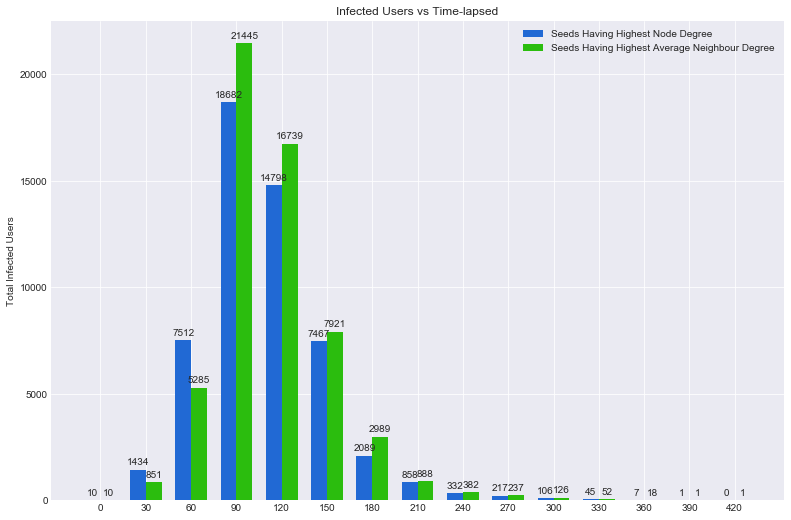

In [22]:
plot_grouped_bar(labels=time_lapsed_labels,
                 first_series=node_degree_time_lapsed1,
                 second_series=neighbour_degree_time_lapsed1, 
                 first_label="Seeds Having Highest Node Degree", 
                 second_label="Seeds Having Highest Average Neighbour Degree", 
                 title="Infected Users vs Time-lapsed",
                 ylabel="Total Infected Users")

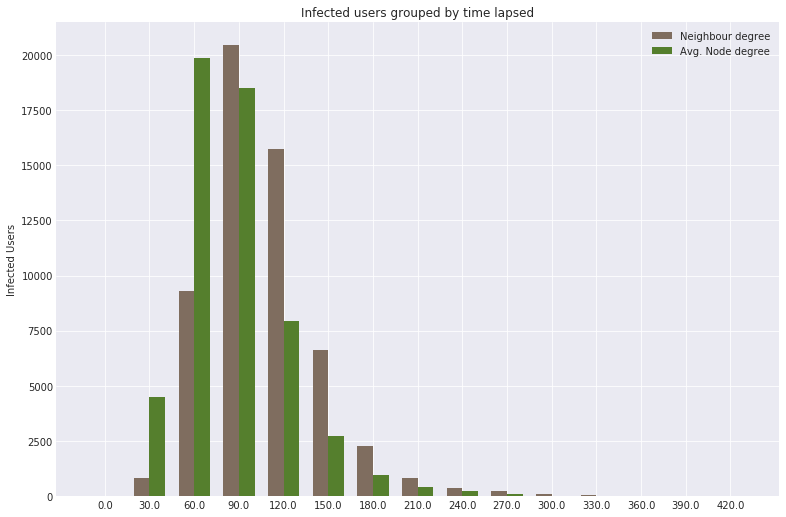

In [57]:
plot_grouped_bar(labels=time_lapsed_labels,
                 first_series=neighbour_degree_time_lapsed, 
                 second_series=node_degree_time_lapsed, 
                 first_label="Neighbour degree", 
                 second_label="Avg. Node degree", 
                 title="Infected users grouped by time lapsed",
                 ylabel="Infected Users")

In [58]:
from itertools import accumulate

neighbour_degree_time_lapsed_agg = list(accumulate(neighbour_degree_time_lapsed))
node_degree_time_lapsed_agg = list(accumulate(node_degree_time_lapsed))

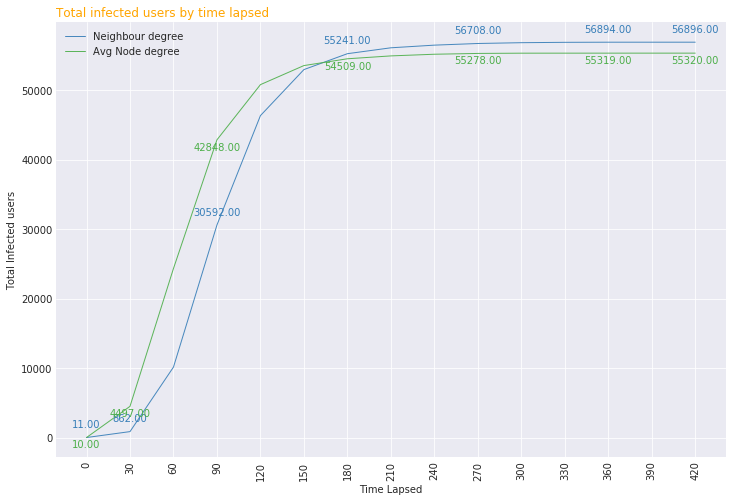

In [63]:
df = pd.DataFrame({"x":time_lapsed_labels,
                   "Neighbour degree":neighbour_degree_time_lapsed_agg,
                   "Avg Node degree": node_degree_time_lapsed_agg})

plot_grouped_line(df=df,
                  title="Total infected users by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Total Infected users")


## Betweenness

In [36]:
neighbour_betweenness_file = "simulation_result_key_node_avg_neighbour_betweenness_0_10_10_start_from_30.csv"
key_node_betweenness_file = "simulation_result_key_node_betweenness_0_10_10_start_time_30_0point75.csv"

In [37]:
neighbour_betweenness_df = pd.read_csv(get_output_file_path(neighbour_betweenness_file))
key_node_betweenness_df = pd.read_csv(get_output_file_path(key_node_betweenness_file))

In [38]:
betweenness_generation_labels = neighbour_betweenness_df.groupby(['generation']).count()['id'].index.tolist()
neighbour_betweenness_generations =  neighbour_betweenness_df.groupby(['generation']).count()['id'].tolist()

In [39]:
key_node_betweenness_generations = key_node_betweenness_df.groupby(['generation']).count()['id'].tolist()
diff = len(neighbour_betweenness_generations) - len(key_node_betweenness_generations)
for i in range(diff):
    key_node_betweenness_generations.append(0)

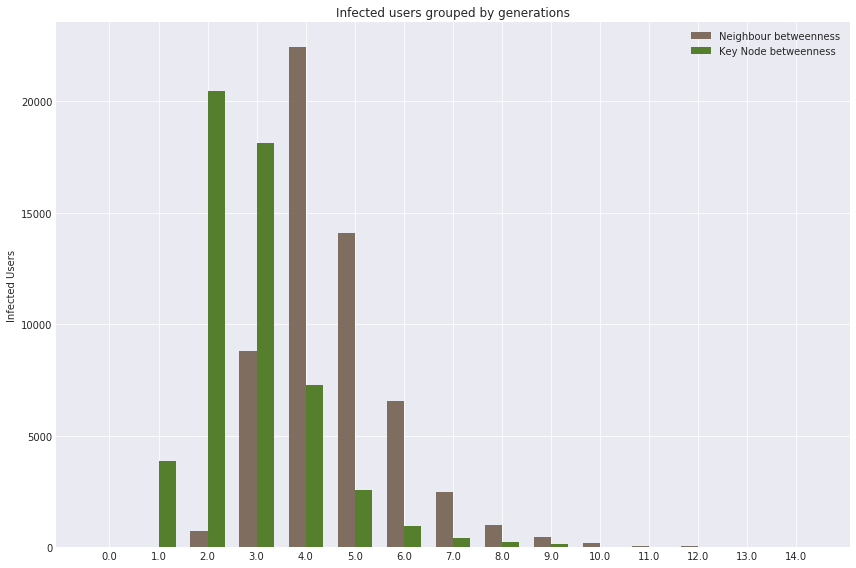

In [64]:
plot_grouped_bar(labels=betweenness_generation_labels,
                 first_series=neighbour_betweenness_generations, 
                 second_series=key_node_betweenness_generations, 
                 first_label="Neighbour betweenness", 
                 second_label="Key Node betweenness", 
                 title="Infected users grouped by generations",
                 ylabel="Infected Users")

In [65]:
betweenness_time_lapsed_labels = neighbour_betweenness_df.groupby(['time_lapsed']).count()['id'].index.tolist()
neighbour_betweenness_time_lapsed =  neighbour_betweenness_df.groupby(['time_lapsed']).count()['id'].tolist()

In [66]:
key_node_betweenness_time_lapsed = key_node_betweenness_df.groupby(['time_lapsed']).count()['id'].tolist()

diff = len(neighbour_betweenness_time_lapsed) - len(key_node_betweenness_time_lapsed)
for i in range(diff):
    key_node_betweenness_time_lapsed.append(0)

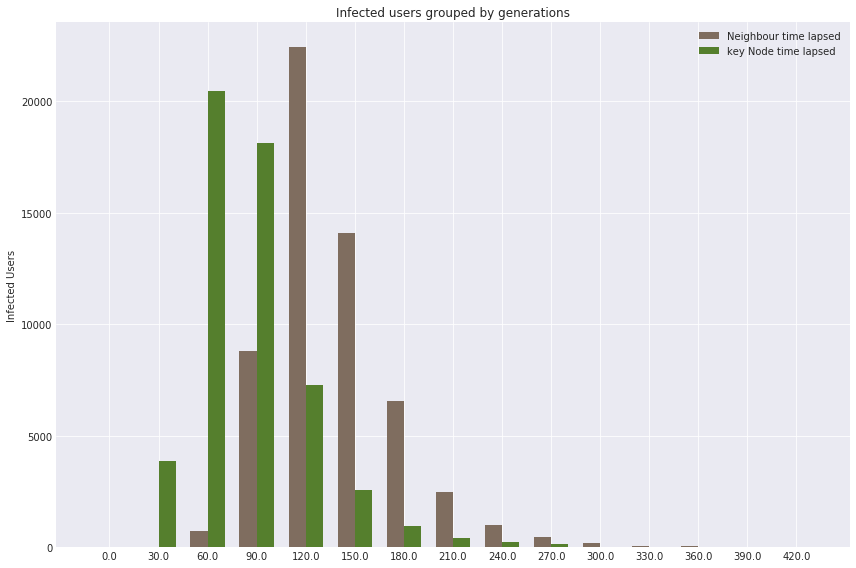

In [67]:
plot_grouped_bar(labels=betweenness_time_lapsed_labels,
                 first_series=neighbour_betweenness_time_lapsed, 
                 second_series=key_node_betweenness_time_lapsed, 
                 first_label="Neighbour time lapsed", 
                 second_label="key Node time lapsed", 
                 title="Infected users grouped by generations",
                 ylabel="Infected Users")

In [68]:
from itertools import accumulate

neighbour_betweenness_time_lapsed_agg = list(accumulate(neighbour_betweenness_time_lapsed))
key_node_betweenness_time_lapsed_agg = list(accumulate(key_node_betweenness_time_lapsed))

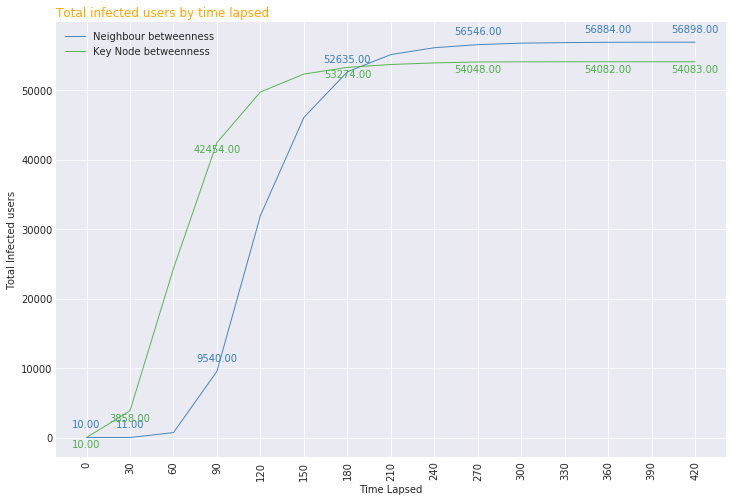

In [69]:
betweenness_df = pd.DataFrame({"x":betweenness_time_lapsed_labels,
                   "Neighbour betweenness":neighbour_betweenness_time_lapsed_agg,
                   "Key Node betweenness": key_node_betweenness_time_lapsed_agg})

plot_grouped_line(df=betweenness_df,
                  title="Total infected users by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Total Infected users")


## givenchy cumulative accuracy

In [199]:
gca_6hrs = pd.read_csv(get_output_file_path("givenchy_cumulative_accuracy_6hrs_6hrs_model.csv"))

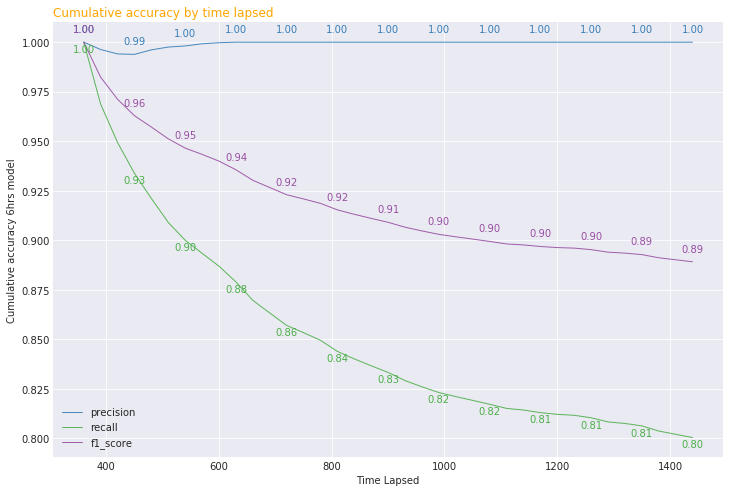

In [200]:
plot_grouped_line(df=gca_6hrs,
                  x_column="hour",
                  title="Cumulative accuracy by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Cumulative accuracy 6hrs model")


In [195]:
givenchy_cumulative_accuracy_6hrs = pd.read_csv(get_output_file_path("givenchy_cumulative_accuracy_6hrs_6hrs_model_retrained.csv"))

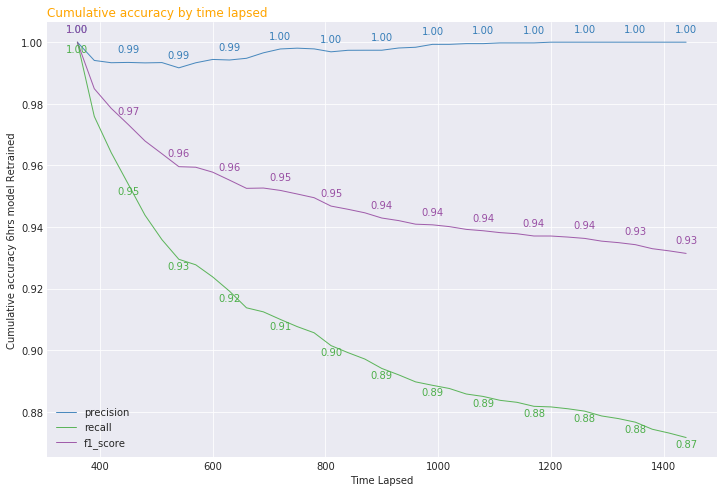

In [201]:
plot_grouped_line(df=gca_retrained_6hrs,
                  x_column="hour",
                  title="Cumulative accuracy by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Cumulative accuracy 6hrs model Retrained")


In [94]:
givenchy_cumulative_accuracy_6hrs = pd.read_csv(get_output_file_path("givenchy_cumulative_accuracy_6hrs_6hrs_model_retrained_by_time_lapsed.csv"))


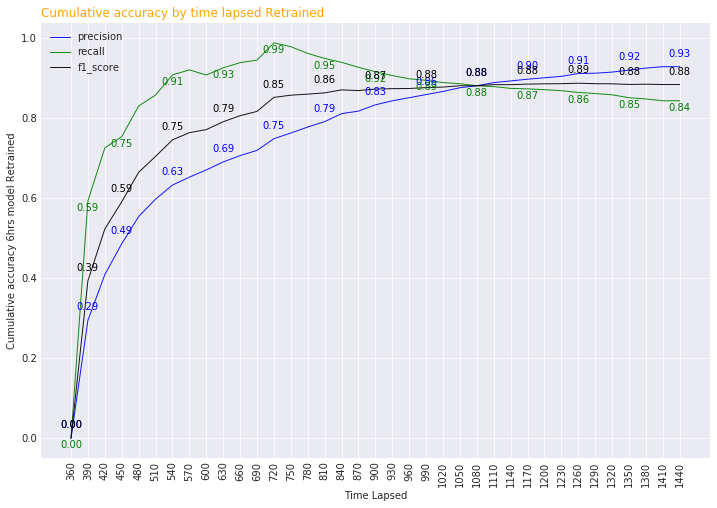

In [121]:
plot_grouped_line(df=givenchy_cumulative_accuracy_6hrs,
                  x_column="hour",
                  title="Cumulative accuracy by time lapsed Retrained",
                  xlabel="Time Lapsed",
                  ylabel="Cumulative accuracy 6hrs model Retrained")


In [126]:
givenchy_cumulative_accuracy_7hrs = pd.read_csv(get_output_file_path("givenchy_cumulative_accuracy_7hrs_7hrs_model_retrained_by_time_lapsed.csv"))


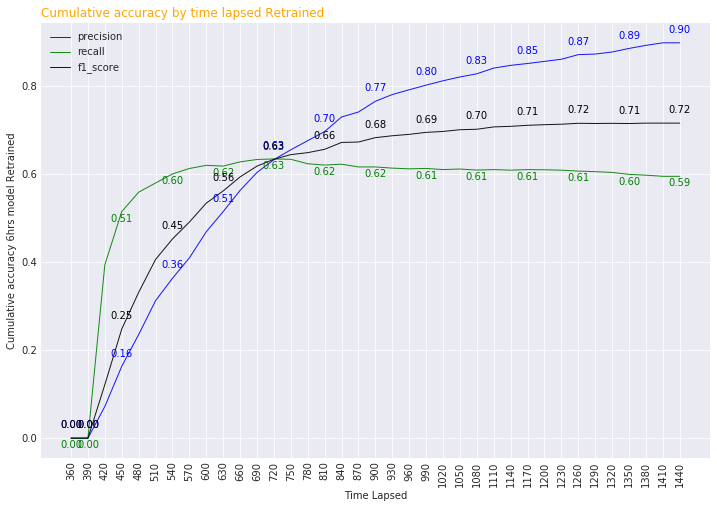

In [127]:
plot_grouped_line(df=givenchy_cumulative_accuracy_7hrs,
                  x_column="hour",
                  title="Cumulative accuracy by time lapsed Retrained",
                  xlabel="Time Lapsed",
                  ylabel="Cumulative accuracy 6hrs model Retrained")


In [128]:
givenchy_cumulative_accuracy_8hrs = pd.read_csv(get_output_file_path("givenchy_cumulative_accuracy_8hrs_8hrs_model_retrained_by_time_lapsed.csv"))

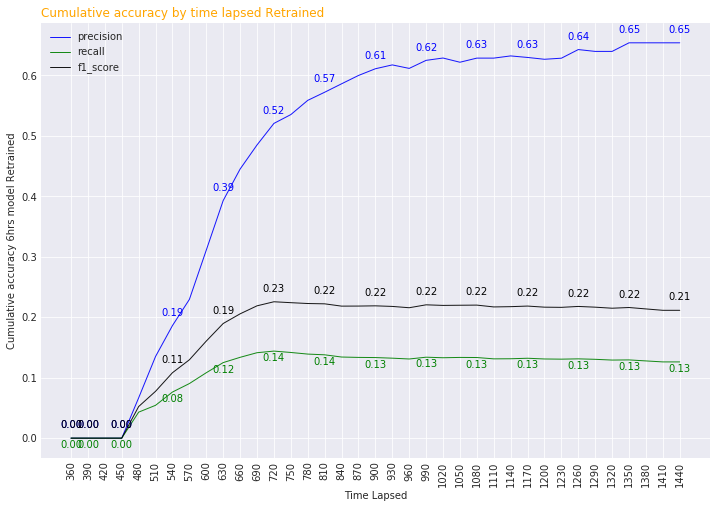

In [129]:
plot_grouped_line(df=givenchy_cumulative_accuracy_8hrs,
                  x_column="hour",
                  title="Cumulative accuracy by time lapsed Retrained",
                  xlabel="Time Lapsed",
                  ylabel="Cumulative accuracy 6hrs model Retrained")

In [93]:
ti_df = pd.read_csv(get_output_file_path("givenchy_total_infection_by_time_lapsed_6hrs_6hrs_model_retrained.csv"))

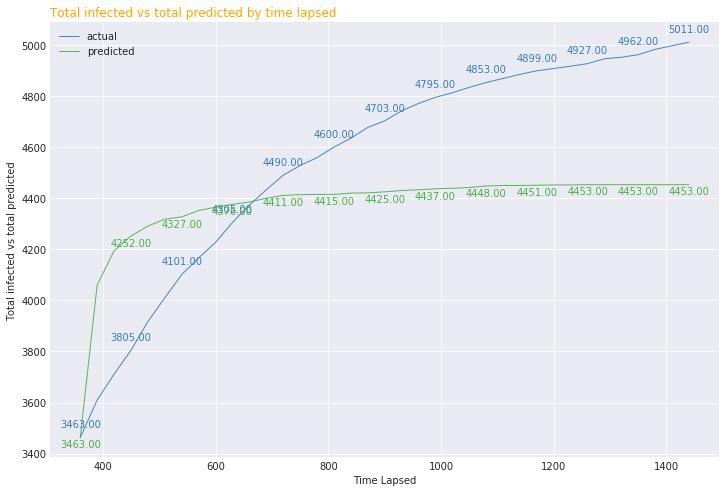

In [210]:
plot_grouped_line(df=ti_df,
                  x_column="hour",
                  title="Total infected vs total predicted by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Total infected vs total predicted")


In [226]:
actual_v_predicted_df = pd.read_csv(get_output_file_path("givenchy_cumulative_accuracy_model_retrained.csv"))

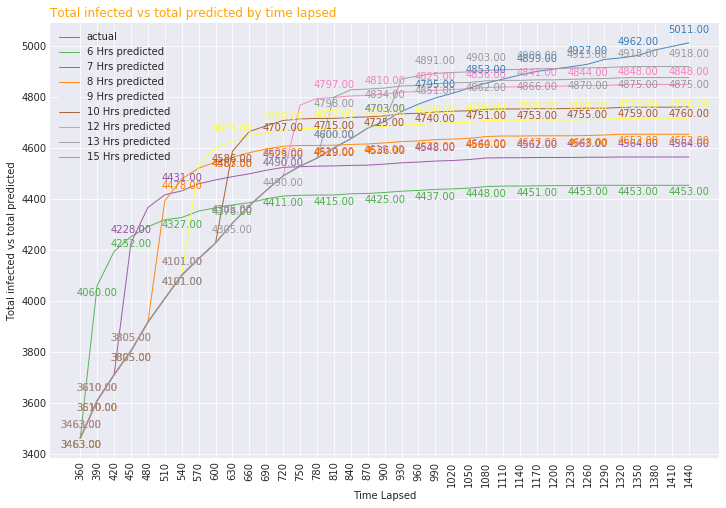

In [227]:
plot_grouped_line(df=actual_v_predicted_df,
                  x_column="hour",
                  title="Total infected vs total predicted by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Total infected vs total predicted")


In [230]:
nyc_accuracy_df = pd.read_csv(get_output_file_path("nyc_actual_vs_predicted_accuracy.csv"))

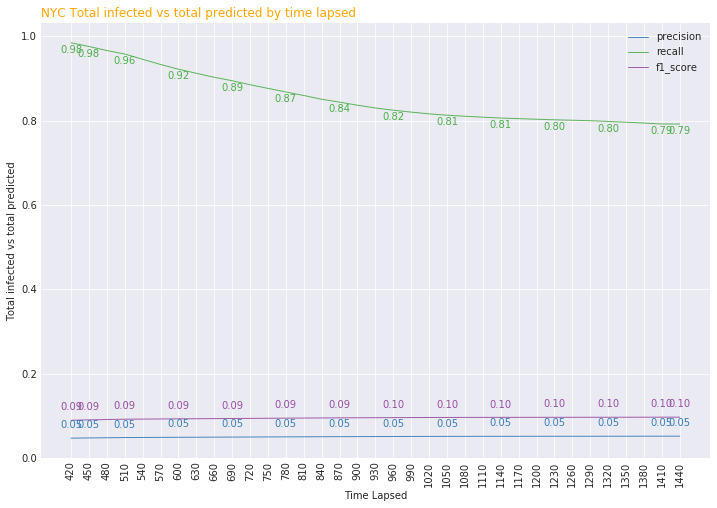

In [231]:
plot_grouped_line(df=nyc_accuracy_df,
                  x_column="hour",
                  title="NYC Total infected vs total predicted by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Total infected vs total predicted")


In [228]:
nyc_error_df = pd.read_csv(get_output_file_path("nyc_inaccurate_results.csv"))

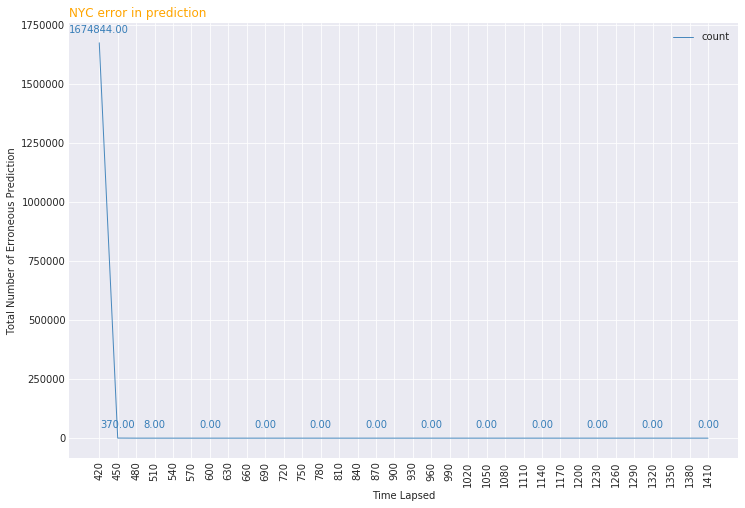

In [232]:
plot_grouped_line(df=nyc_error_df,
                  x_column="hour",
                  title="NYC error in prediction",
                  xlabel="Time Lapsed",
                  ylabel="Total Number of Erroneous Prediction")


In [284]:
givenchy_seed_by_time_df = pd.read_csv(get_output_file_path("givenchy_seed_by_time.csv"))

In [264]:
def plot_bar(x, y, xlabel, ylabel, title):
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, y, width, color='#7f6d5f')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    autolabel(rects1)

    fig.tight_layout()

    plt.show()


In [286]:
givenchy_seed_by_time_df = givenchy_seed_by_time_df.drop('count', 1)

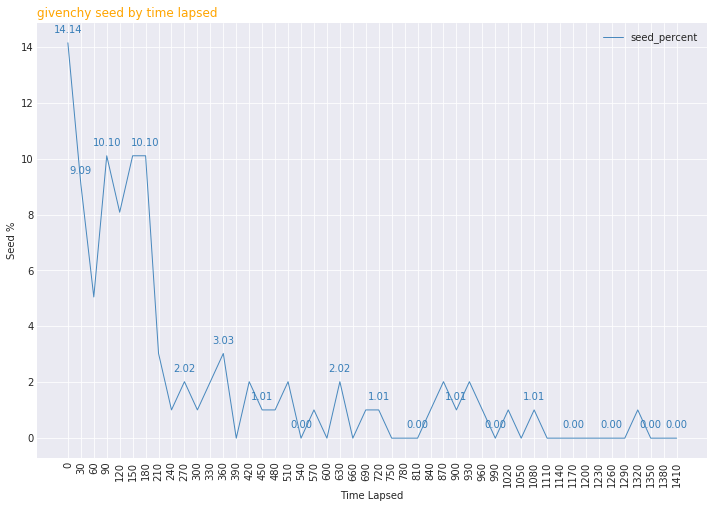

In [287]:
plot_grouped_line(df=givenchy_seed_by_time_df,
                  x_column="hour",
                  title="givenchy seed by time lapsed",
                  xlabel="Time Lapsed",
                  ylabel="Seed %")


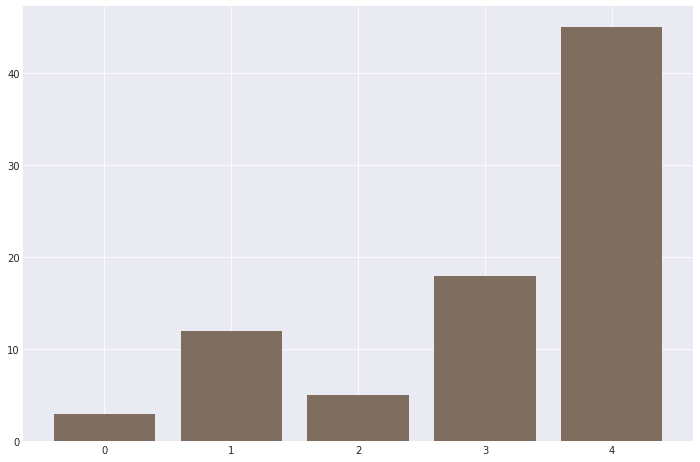

In [283]:
# Make a fake dataset:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height, color='#7f6d5f')
 
# Create names on the x-axis
#plt.xticks(givenchy_seed_x, givenchy_seed_x)
 
# Show graphic
plt.show()


## Key node identification

In [254]:
def plot_network_single_seed(graph, title, root_idx):
    plt.axis('off')
    root_node = graph.nodes[root_idx]
    pos = graphviz_layout(graph, prog="twopi", args='')
    depth = max(nx.get_node_attributes(graph,'generation').values()) + 1
    colors = get_colors(depth)
    color = [colors[graph.node[n].get("generation", 0)] for n in graph]
    dzcnapy.small_attrs["node_color"] = color
    nx.draw_networkx(graph, pos=pos, with_labels=False, **dzcnapy.small_attrs)
    patchList = []
    for index in range(depth):
        data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
        patchList.append(data_key)
    plt.legend(handles=patchList)
    dzcnapy.set_extent(pos, plt)
    dzcnapy.plot(title, [24, 16], save=True)
    
def spreading_network_single_seed(users, title, root_idx):
    users = users[users['time_lapsed'].isnull() == False]
    a=[0,1,2]
    unique_users=users[users.generation.isin(a)]
    network_all = build_networkx_graph(unique_users)
    plot_network_single_seed(network_all, title, root_idx)
    

In [226]:
stanford_seed_806 = load_pickle_file(get_output_file_path("simulation_result_key_node_betweenness_stanford_seed_806.dat"))

Loading data file from /Users/syamantak/JayateeB/dissertation/output/simulation_result_key_node_betweenness_stanford_seed_806.dat
Loaded 9765 entries


100%|██████████| 9509/9509 [00:00<00:00, 11672.74it/s]


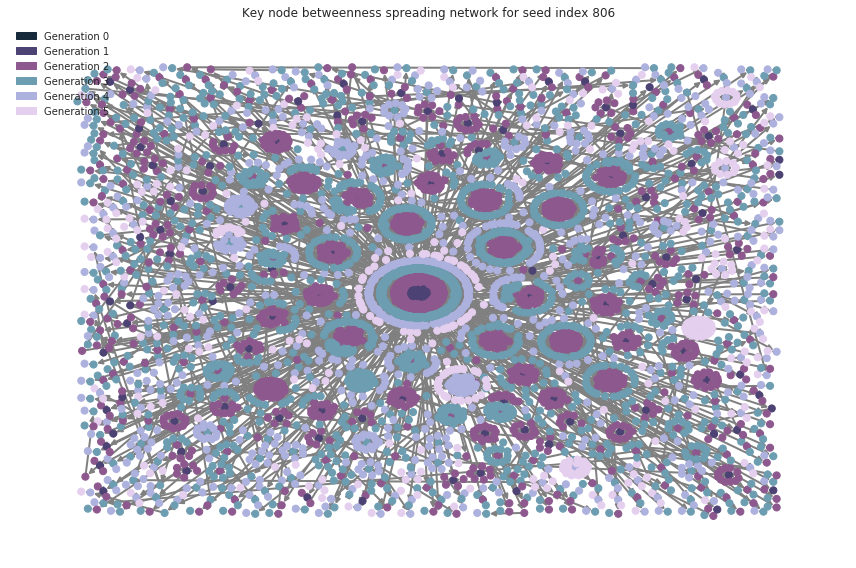

In [229]:
spreading_network(stanford_seed_806, "Key node betweenness spreading network for seed index 806")

100%|██████████| 5004/5004 [00:00<00:00, 10624.23it/s]


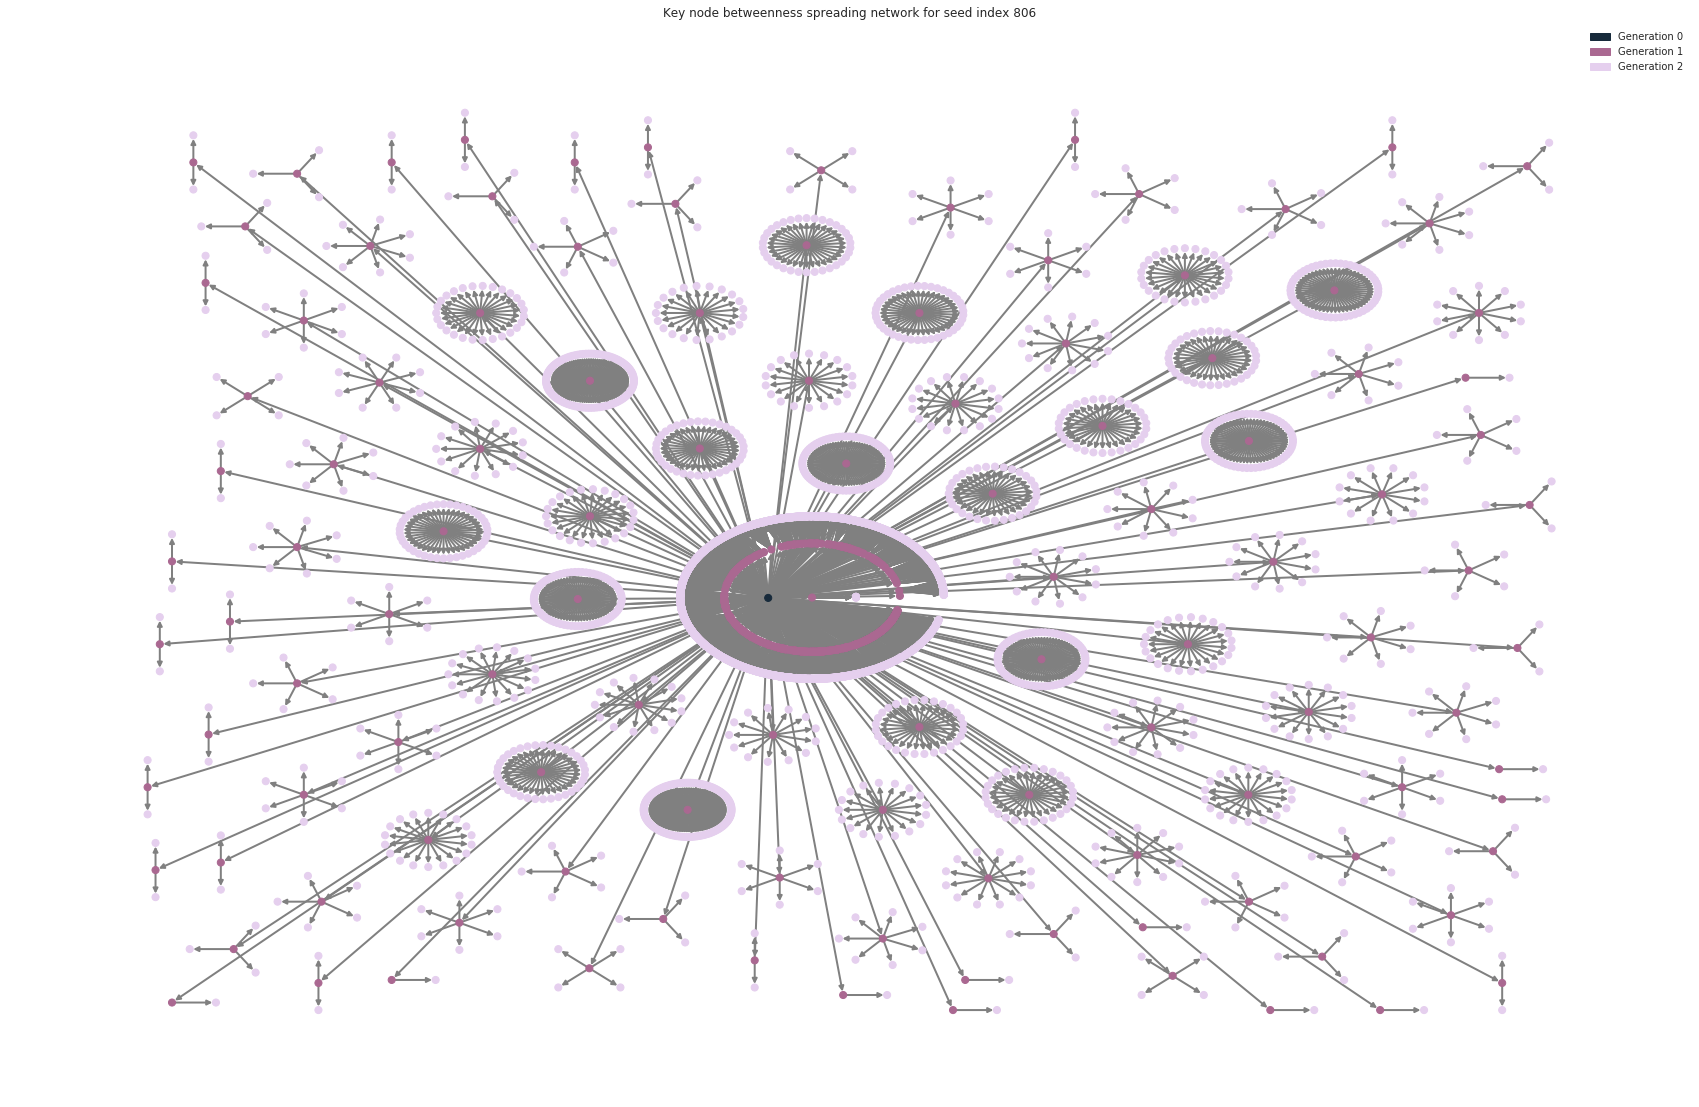

In [255]:
spreading_network_single_seed(stanford_seed_806, "Key node betweenness spreading network for seed index 806", 806)

In [145]:
stanford_seed_1441 = pd.read_csv(get_output_file_path("simulation_result_key_node_betweenness_stanford_seed_1441.csv"))

100%|██████████| 9170/9170 [00:00<00:00, 13025.09it/s]


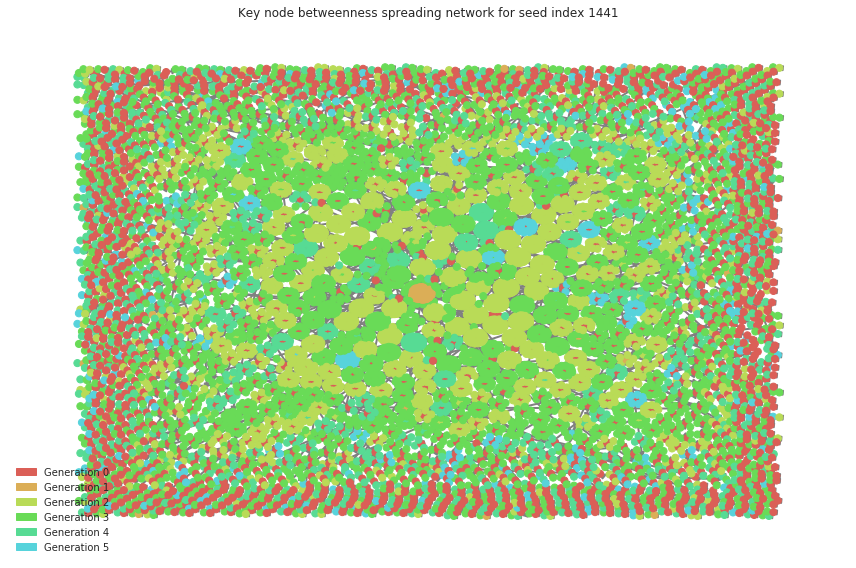

In [146]:
spreading_network(stanford_seed_1441, "Key node betweenness spreading network for seed index 1441")